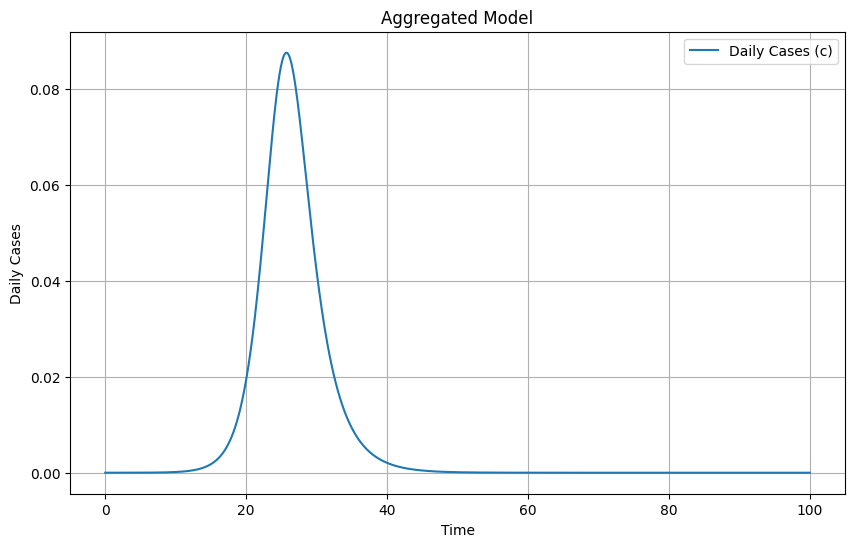

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def SIR_model(x,t,beta,gamma):
    S, I, R = x

    dS_dt = - beta * I * S/(S+I+R)
    dI_dt = beta * I * S / (S+I+R) - gamma * I
    dR_dt = gamma*I
    return [dS_dt, dI_dt, dR_dt]

#solution
def dailyCases(beta,gamma):
  sol = odeint(SIR_model, x0, time_points,rtol=1e-6, atol=1e-12,args=(beta,gamma))
  S = sol[:, 0]
  I = sol[:, 1]
  R = sol[:, 2]
  return beta*S*I/N

# Parameters
beta = 1  # Infection rate
gamma = 0.5 # Recovery rate
N = 1    # Total population

# Initial conditions
I_0 = 1/1e6     # Initial infected population
S_0 = N-I_0  # Initial susceptible population (exposed)
R_0 = 0      # Initial recovered population
x0 = [S_0, I_0, R_0]

# Time solution
t_start = 0.0
t_end = 100.0
num_points = 1000
time_points = np.linspace(t_start, t_end, num_points)

cases=dailyCases(beta,gamma)

plt.figure(figsize=(10, 6))
plt.plot(time_points, cases, label='Daily Cases (c)')
plt.title('Aggregated Model')
plt.xlabel('Time')
plt.ylabel('Daily Cases')
plt.grid(True)
plt.legend()
plt.show()
